<a href="https://colab.research.google.com/github/xcccl1/BDAO_IMA/blob/main/BDAO_IMA_Cloud_Project_grouop6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Authentication**

Everytime before you make connection to Google Cloud via API, you need to run the below code to grant access to Google Cloud services.

In [ ]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

# **Load data into BigQuery**

The following codes help you load data from bucket to your BigQuery.

### Step 0: (Optional) Create a new project in Google Cloud

If you want an independent project to handle the data and analysis, you can create a new project in your Google Cloud.
![picture](https://drive.google.com/uc?id=18bayQbOjHw8Uq-QkMwYhupi8FPtT9Dmm)

Of course, you can continue using the existed project if you wish.


### Step 1: Create a new dataset in your BigQuery to store your project data

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

In [ ]:
def create_dataset(project_id, dataset_id, location="US"):
    client = bigquery.Client(project=project_id)
    dataset_ref = bigquery.DatasetReference(project_id, dataset_id)
    dataset = bigquery.Dataset(dataset_ref)
    dataset.location = location

    created_dataset = client.create_dataset(dataset, timeout=30)  # Waits 30 seconds
    print("Dataset {} created.".format(created_dataset.dataset_id))

# Usage
create_dataset('bdaoima-422710', 'restaurant_data') # Replace 'your-project-id' with your Google Cloud project ID and 'your-new-datatset-name' with your desired dataset name

Conflict: 409 POST https://bigquery.googleapis.com/bigquery/v2/projects/bdaoima-422710/datasets?prettyPrint=false: Already Exists: Dataset bdaoima-422710:restaurant_data

### Step 2: Load data into the dataset you just created in BigQuery

In [ ]:
# Load the restaurant data into BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
# (optional) you could change the table name with a new name but not a problem not to change
project_id = "bdaoima-422710"
dataset_name = "restaurant_data"
table_name = "restaurant_data"
bucket_name = "yelp-data-bdao" # don't make changes here
blob_name = "restaurant_data.csv" # don't make changes here

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.CSV

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: bdaoima-422710.restaurant_data.restaurant_data


In [ ]:
# Load the restaurant tips data into BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
# (optional) you could change the table name with a new name but not a problem not to change
project_id = "bdaoima-422710"
dataset_name = "restaurant_data"
table_name = "restaurant_tips"
bucket_name = "yelp-data-bdao" # don't make changes here
blob_name = "restaurant_tips.csv" # don't make changes here

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.CSV

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: bdaoima-422710.restaurant_data.restaurant_tips


In [ ]:
# Load the data into BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
# (optional) you could change the table name with a new name but not a problem not to change
project_id = "bdaoima-422710"
dataset_name = "restaurant_data"
table_name = "restaurant_checkin"
bucket_name = "yelp-data-bdao" # don't make changes here
blob_name = "restaurant_checkin.csv" # don't make changes here

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.CSV

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: bdaoima-422710.restaurant_data.restaurant_checkin


Until here, you have successfully loaded all data into your data warehouse (BigQuery) in Google Cloud.

# **Query data from BigQuery and do analysis**

Now that the data is stored in BigQuery, you can make connection to BigQuery and extract data you want.

### Query data from restaurant data file (examples)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "bdaoima-422710"
dataset_name = "restaurant_data"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
1,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,TN,37188,36.464747,-86.659187,3.5,8,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
2,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,201 Jefferson St,Bala Cynwyd,PA,19004,40.028357,-75.238084,5.0,12,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
3,RK6-cJ9hj53RzOlCBmpT-g,Impasto,None,Tampa,FL,33611,27.890814,-82.502346,5.0,5,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
4,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab,51 Ludwig Dr,Fairview Heights,IL,62208,38.601298,-89.989683,2.5,14,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


####Data check&cleaning

In [ ]:
restaurant_df.shape

(52286, 777)

In [ ]:
restaurant_df.dtypes

business_id        object
name               object
address            object
city               object
state              object
                   ...   
GoodForDancing    boolean
BestNights         object
BYOB              boolean
Corkage           boolean
Parking           boolean
Length: 777, dtype: object

In [ ]:
restaurant_df.duplicated().sum()

0

In [ ]:
main_col=['business_id','name','address','city','state','postal_code','latitude','longitude','stars','review_count','is_open','attributes','categories','hours']
category_col=restaurant_df.columns[restaurant_df.columns.str.startswith('category_')].to_list()
restaurant_df[main_col].isnull().sum()

#from the results we can see that some of the columns exists null value,but it doesn't matter to the analysis,so we just keep it without handling

business_id        0
name               0
address          443
city               0
state              0
postal_code       21
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       566
categories         0
hours           7279
dtype: int64

In [ ]:
restaurant_df[main_col].dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      Int64
is_open           Int64
attributes       object
categories       object
hours            object
dtype: object

In [ ]:
#extract the category columns to count the frequencecy of each category
category_col=restaurant_df.columns[restaurant_df.columns.str.startswith('category_')].to_list()
len(category_col)

730

In [ ]:
category_num=restaurant_df[category_col].apply(lambda x: x.sum())
top10_category=category_num.sort_values(ascending=False).head(10)

<Axes: >

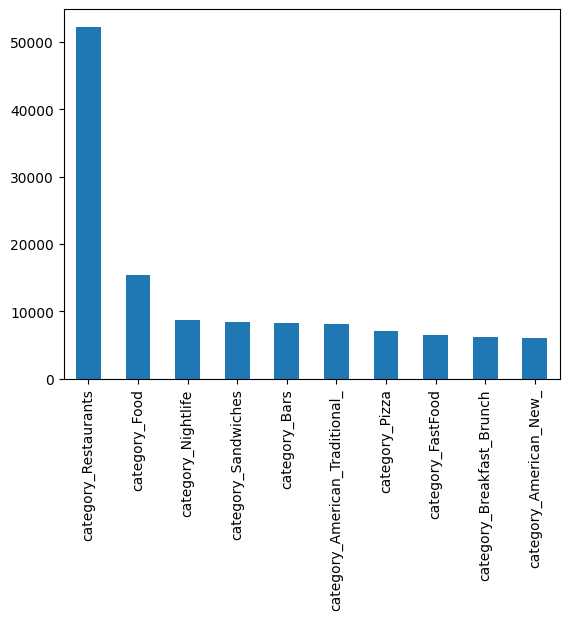

In [ ]:
import matplotlib.pyplot as plt
top10_category.plot(kind='bar')

In [ ]:
resaurant_other_df=restaurant_df.drop(columns=category_col+main_col,axis=1)
resaurant_other_df.columns.to_list()

['RestaurantsDelivery',
 'OutdoorSeating',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'BikeParking',
 'RestaurantsPriceRange2',
 'RestaurantsTakeOut',
 'ByAppointmentOnly',
 'WiFi',
 'Alcohol',
 'Caters',
 'RestaurantsAttire',
 'RestaurantsReservations',
 'Ambience',
 'GoodForKids',
 'CoatCheck',
 'DogsAllowed',
 'RestaurantsTableService',
 'RestaurantsGoodForGroups',
 'WheelchairAccessible',
 'HasTV',
 'HappyHour',
 'DriveThru',
 'NoiseLevel',
 'GoodForMeal',
 'BusinessAcceptsBitcoin',
 'Smoking',
 'Music',
 'GoodForDancing',
 'BestNights',
 'BYOB',
 'Corkage',
 'Parking']

In [ ]:
resaurant_other_df

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,...,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,True,<NA>,<NA>,None,<NA>,2,True,<NA>,None,None,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,None,<NA>,1,<NA>,<NA>,None,None,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,"{'valet': False, 'garage': False, 'street': Fa...",<NA>,<NA>,<NA>,<NA>,None,None,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
3,False,<NA>,True,None,<NA>,<NA>,True,<NA>,None,None,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
4,True,<NA>,<NA>,"{'valet': False, 'garage': False, 'street': Fa...",<NA>,<NA>,True,<NA>,None,None,...,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52281,True,True,True,"{'garage': False, 'street': True, 'validated':...",True,1,True,<NA>,'no','beer_and_wine',...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True
52282,False,True,True,None,True,2,False,<NA>,'no','beer_and_wine',...,'loud',"{'dessert': False, 'latenight': False, 'lunch'...",False,'no',"{'dj': False, 'background_music': True, 'no_mu...",False,"{'monday': False, 'tuesday': False, 'friday': ...",<NA>,<NA>,False
52283,False,False,True,"{'garage': False, 'street': False, 'validated'...",True,1,True,<NA>,'no','beer_and_wine',...,'average',"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,False
52284,False,False,True,"{'garage': False, 'street': False, 'validated'...",False,1,True,<NA>,None,'beer_and_wine',...,None,"{'dessert': False, 'latenight': False, 'lunch'...",<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [ ]:
restaurant_df[main_col].describe()

,latitude,longitude,stars,review_count,is_open
count,52286.000000,52286.000000,52286.000000,52286.0,52286.0
mean,36.997663,-87.845038,3.515234,87.241078,0.669472
std,6.010943,13.813532,0.829585,188.912445,0.470408
min,27.564457,-120.083748,1.000000,5.0,0.0
25%,32.217586,-90.233506,3.000000,13.0,0.0
50%,39.484140,-86.035621,3.500000,33.0,1.0
75%,39.958370,-75.337533,4.000000,89.0,1.0
max,53.679197,-74.664459,5.000000,7568.0,1.0


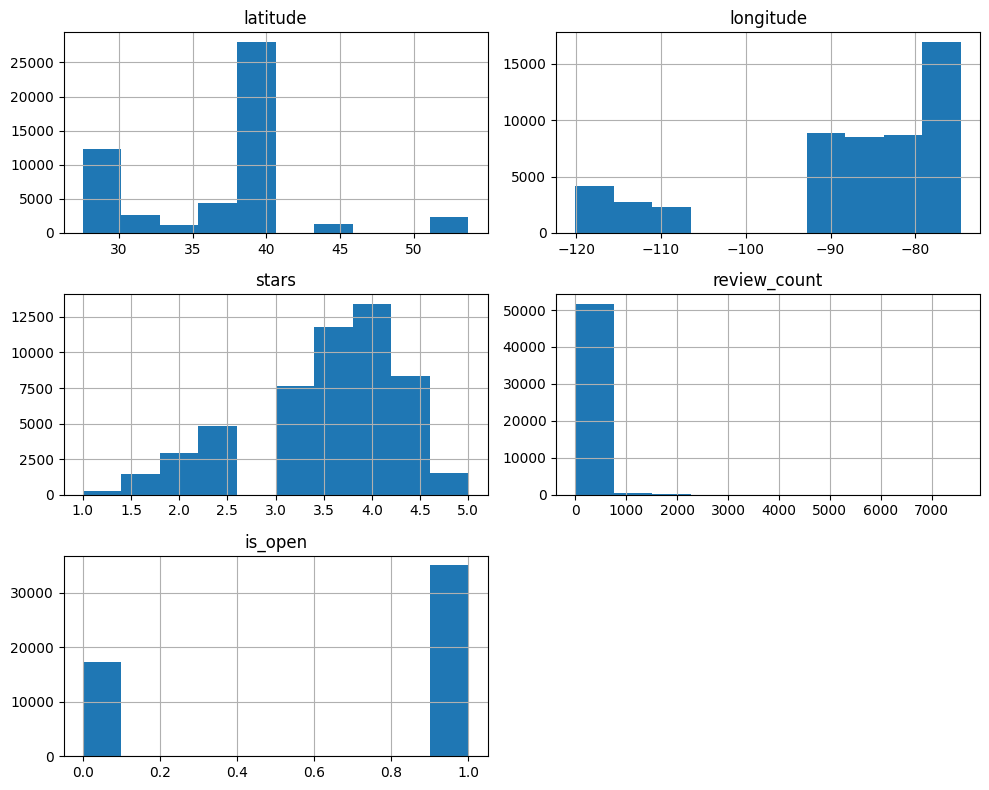

In [ ]:
import matplotlib.pyplot as plt
restaurant_df[main_col].hist(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

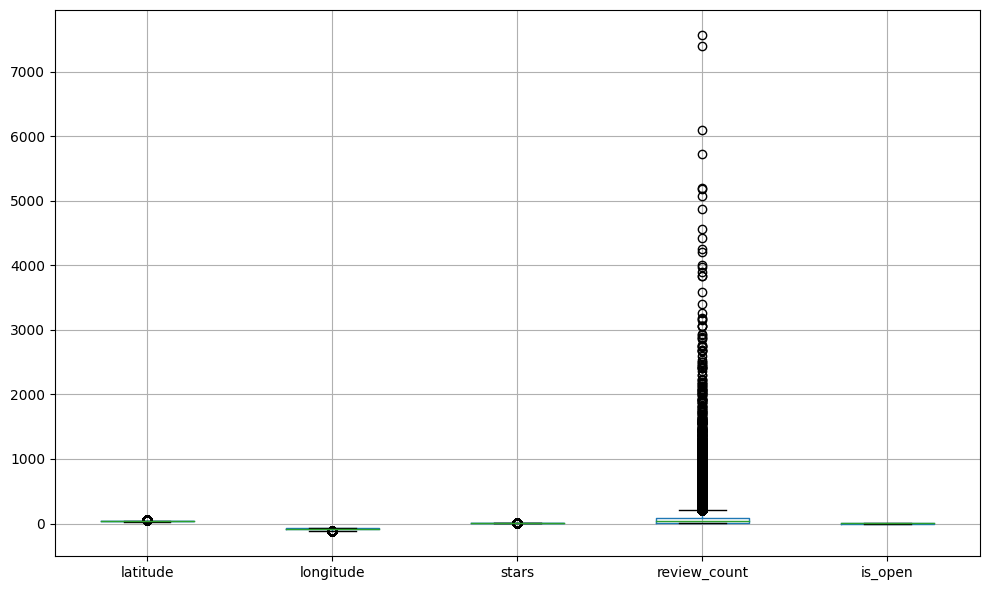

In [ ]:
# Create subplots for each column
restaurant_df[main_col].boxplot(figsize=(10, 6))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

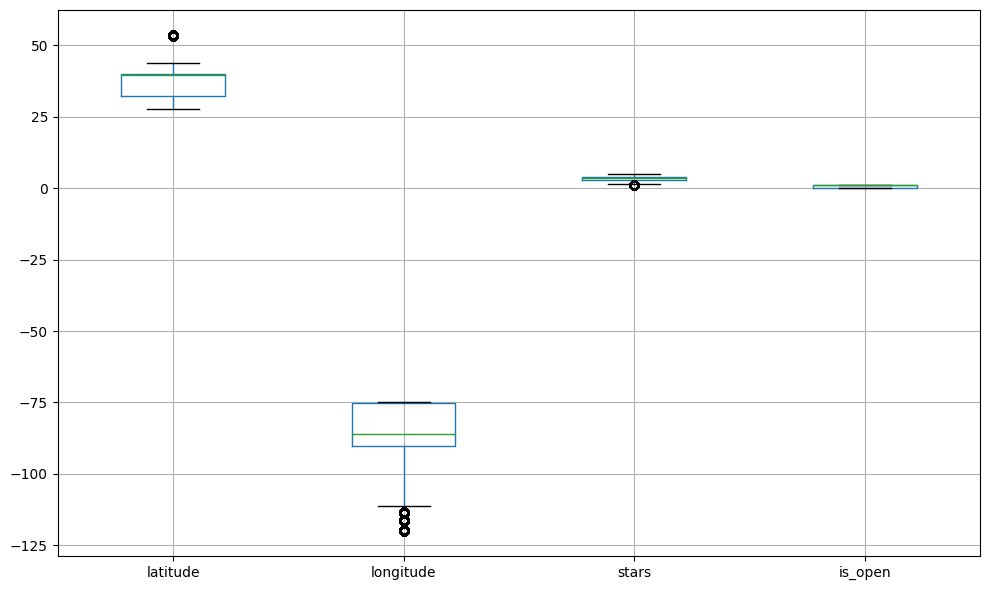

In [ ]:
# Create subplots for each column(exclude review_count)
main_restaurant_df=restaurant_df[main_col]
main_restaurant_df.drop('review_count',axis=1).boxplot(figsize=(10,6))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
main_restaurant_df=restaurant_df[main_col]
corr1 = main_restaurant_df.drop(columns=['business_id','name','address','city','state','postal_code','attributes','categories','hours'],axis=1).corr()
corr1.style.background_gradient(cmap='coolwarm').format(precision=2)

,latitude,longitude,stars,review_count,is_open
latitude,1.00,-0.17,-0.03,-0.09,0.01
longitude,-0.17,1.00,-0.01,-0.04,-0.00
stars,-0.03,-0.01,1.00,0.16,0.01
review_count,-0.09,-0.04,0.16,1.00,0.13
is_open,0.01,-0.00,0.01,0.13,1.00


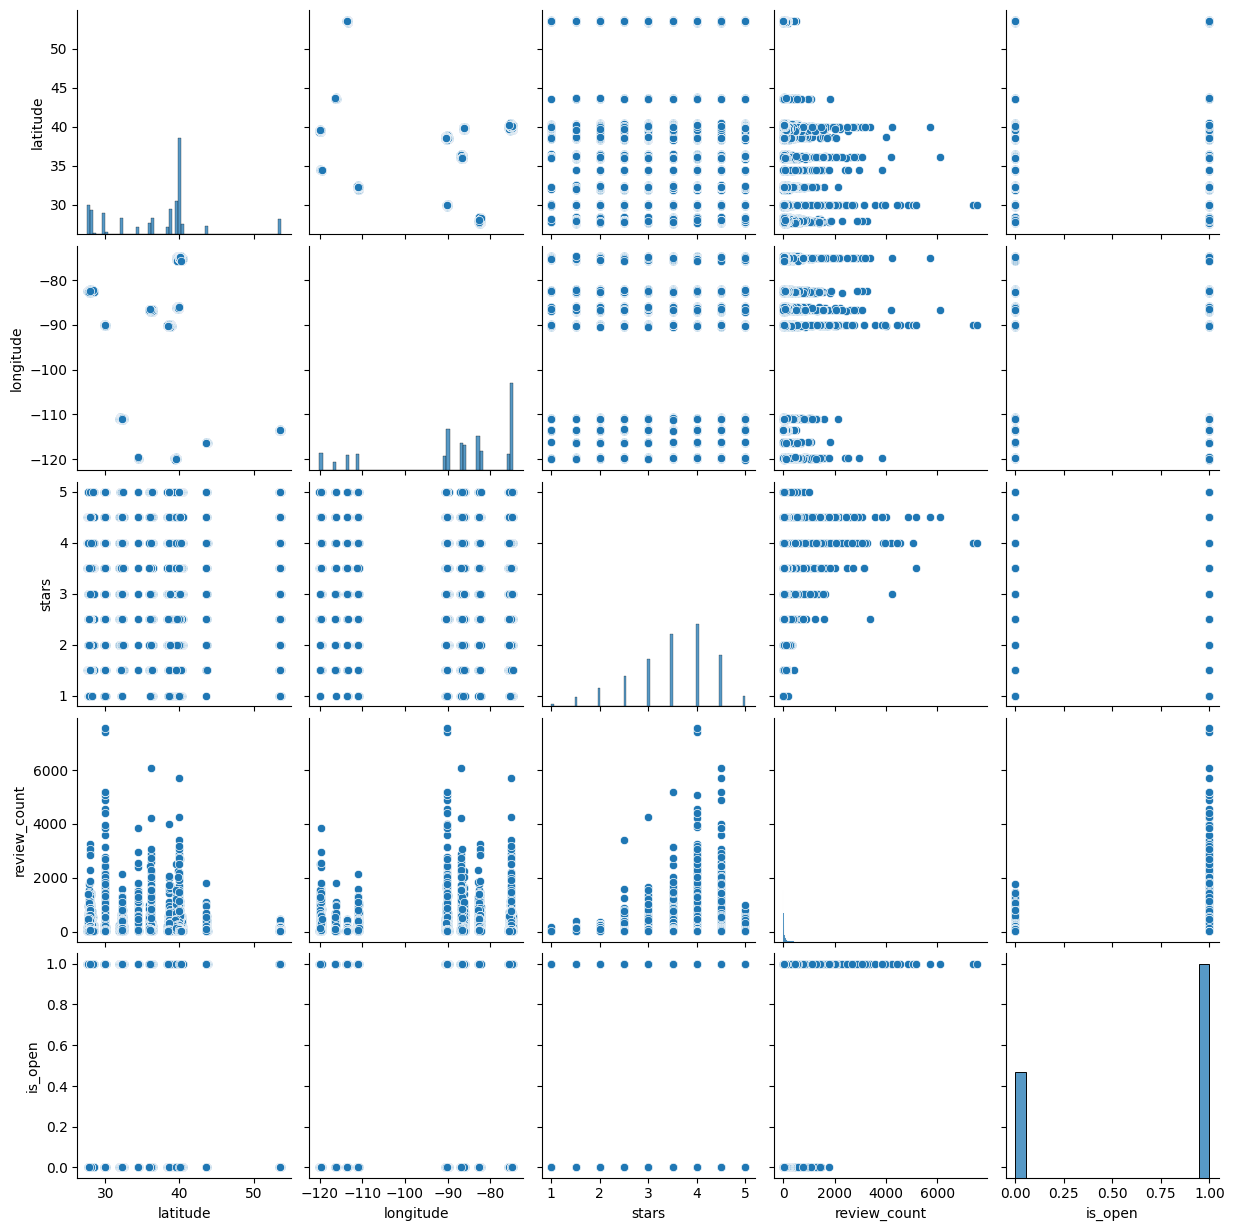

In [ ]:
import seaborn as sns
sns.pairplot(main_restaurant_df.drop(columns=['business_id','name','address','city','state','postal_code','attributes','categories','hours'],axis = 1))

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT business_id, name, address, city, state, stars, review_count, is_open, categories,latitude,longitude
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

clean_restaurant_df = query_job.to_dataframe()
clean_restaurant_df.head()

,business_id,name,address,city,state,stars,review_count,is_open,categories,latitude,longitude
0,IvQs2hhXKZ4NgZhVZ5jjjQ,Pumpernickles Catering,95a Mount Pleasant,Liverpool,XMS,4.0,5,1,"Caterers, Breakfast & Brunch, Convenience Stor...",38.673049,-90.423156
1,bw90rjFL02A_8rVE34m5Lg,Cosmetic Solutions,1010 Lula Lula Dr,Lula Lula,HI,3.5,17,1,"Cosmetic Surgeons, Pizza, Doctors, Beauty & Sp...",38.816486,-90.321750
2,em474WuTw7-OkhPfX4EohA,IHOP,702 Blowing Rock Rd,Boone,NC,2.0,29,0,"Breakfast & Brunch, Coffee & Tea, Food, Americ...",36.378837,-86.463779
3,gCF0QQWzI9lDouhLfTbYCA,MudMan Food Truck,None,Kalispell,MT,5.0,6,0,"Restaurants, American (Traditional), Food Truc...",27.789678,-82.680746
4,1H9WYGFJ4AFwXq7WCOOMtg,Two Elk Restaurant,12000 Skyline Dr,Vail,CO,3.5,12,0,"Buffets, Restaurants",32.094854,-110.773491


In [ ]:
# First, ensure pandas-gbq is installed
# !pip install pandas-gbq

# Specify the destination table and dataset in BigQuery
# Replace 'your_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'restaurant_data.clean_restaurant_df'
project_id = 'bdaoima-422710'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
clean_restaurant_df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 1526.87it/s]


In [ ]:
# Query data based on condition from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
    WHERE state = 'PA'
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

####Aggregating data by name to build cluster

In [ ]:
# Aggregating data by name,extract the count of restaurants,averge review count,average stars for the same name
query = f"""
SELECT name,
count(business_id) as num_restaurant,
round(avg(review_count),2) as avg_review_count,
round(avg(stars),2) as avg_stars FROM `{project_id}.{dataset_name}.{table_name}`
group by name
order by avg_review_count desc,avg_stars desc;

"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_name_aggdf = query_job.to_dataframe()
restaurant_name_aggdf.head()

,name,num_restaurant,avg_review_count,avg_stars
0,Oceana Grill,1,7400.0,4.0
1,Hattie B’s Hot Chicken - Nashville,1,6093.0,4.5
2,Reading Terminal Market,1,5721.0,4.5
3,Ruby Slipper - New Orleans,1,5193.0,4.5
4,Royal House,1,5070.0,4.0


In [ ]:
restaurant_name_aggdf.dtypes

name                 object
num_resaurant         Int64
avg_review_count    float64
avg_stars           float64
dtype: object

In [ ]:
restaurant_name_aggdf.isnull().sum()

name                0
num_resaurant       0
avg_review_count    0
avg_stars           0
dtype: int64

In [ ]:
restaurant_name_aggdf.duplicated().sum()

0

In [ ]:
restaurant_name_aggdf.describe()

,num_restaurant,avg_review_count,avg_stars
count,36744.0,36744.000000,36744.000000
mean,1.422981,98.016429,3.747898
std,7.064371,199.508106,0.680778
min,1.0,5.000000,1.000000
25%,1.0,15.000000,3.500000
50%,1.0,39.000000,4.000000
75%,1.0,105.000000,4.000000
max,703.0,7400.000000,5.000000


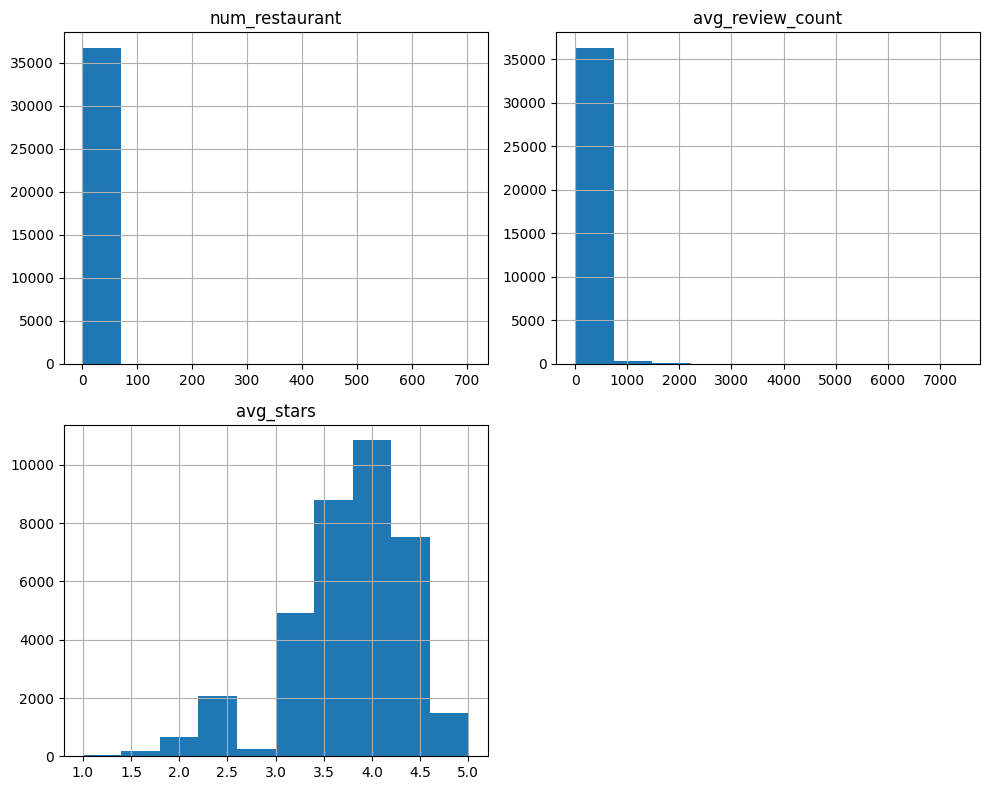

In [ ]:
import matplotlib.pyplot as plt
# Create subplots for each column
restaurant_name_aggdf.drop(['name'],axis = 1).hist(figsize=(10, 6))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
restaurant_name_aggdf.head()

,name,num_restaurant,avg_review_count,avg_stars,Cluster_kmeans
0,Oceana Grill,1,7400.0,4.0,1
1,Hattie B’s Hot Chicken - Nashville,1,6093.0,4.5,1
2,Reading Terminal Market,1,5721.0,4.5,1
3,Ruby Slipper - New Orleans,1,5193.0,4.5,1
4,Royal House,1,5070.0,4.0,1


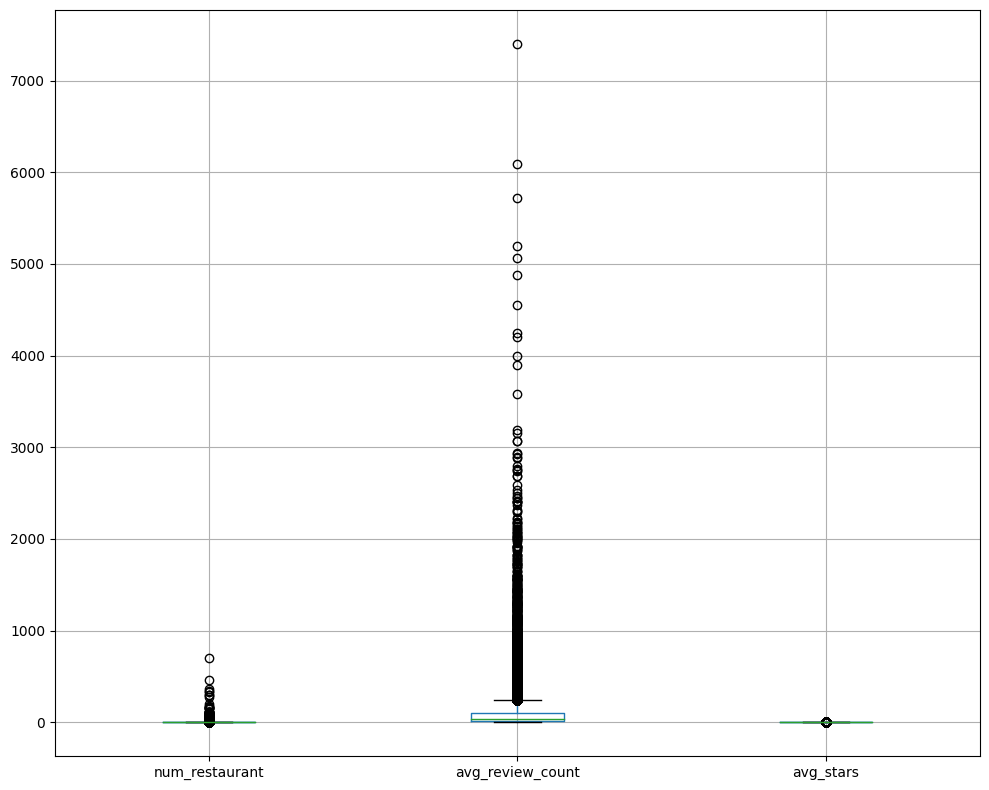

In [ ]:
import matplotlib.pyplot as plt
# Create subplots for each column
restaurant_name_aggdf.drop(['name'],axis = 1).boxplot(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
corr1 = restaurant_name_aggdf.drop(['name'],axis = 1).corr()
corr1.style.background_gradient(cmap='coolwarm').format(precision=2)

,num_restaurant,avg_review_count,avg_stars
num_restaurant,1.00,-0.01,-0.07
avg_review_count,-0.01,1.00,0.10
avg_stars,-0.07,0.10,1.00


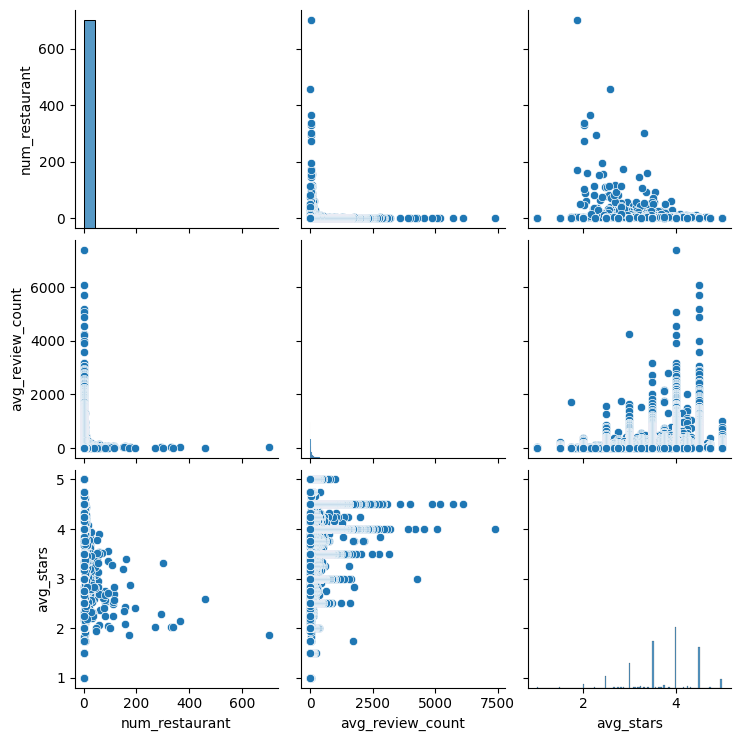

In [ ]:
import seaborn as sns
sns.pairplot(restaurant_name_aggdf.drop(['name'],axis = 1))

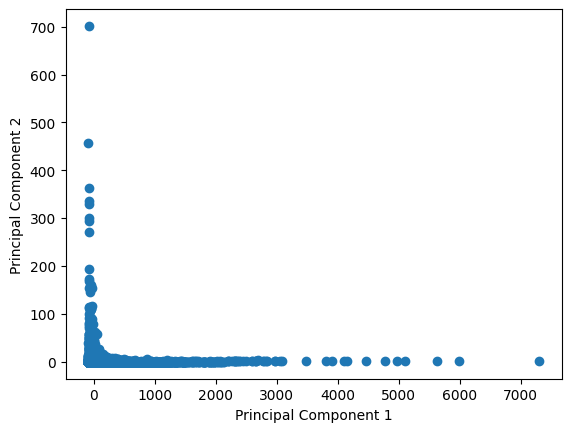

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# create a dataframe with the variable we would like to use for clustering
data = restaurant_name_aggdf.drop(['name'], axis = 1)

# Assuming you have a DataFrame named 'df' with multiple columns
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import numpy as np
data=restaurant_name_aggdf.drop(['name'],axis = 1)

#Since the data skew, logarithmic transformation is used
data['log_avg_review_count'] = np.log1p(data['avg_review_count'])
data['log_num_restaurant'] = np.log1p(data['num_restaurant'])
names=data.columns

# Standardize the data
scaler_s = StandardScaler()
data[['std_num_restaurant','std_avg_review_count']] = scaler_s.fit_transform(data[['log_num_restaurant','log_avg_review_count']])

scaler_minmax = MinMaxScaler()
data['std_avg_stars'] = scaler_minmax.fit_transform(data[['avg_stars']])

data['std_minmax_avg_review_count'] = scaler_minmax.fit_transform(data[['log_avg_review_count']])
data['std_minmax_num_restaurant'] = scaler_minmax.fit_transform(data[['log_num_restaurant']])
data.head()

,num_restaurant,avg_review_count,avg_stars,Cluster_kmeans,log_avg_review_count,log_num_restaurant,std_num_restaurant,std_avg_review_count,std_avg_stars,std_minmax_avg_review_count,std_minmax_num_restaurant
0,1,7400.0,4.0,1,8.909370,0.693147,-0.233495,4.143265,0.750,1.000000,0.0
1,1,6093.0,4.5,1,8.715060,0.693147,-0.233495,3.986724,0.875,0.972700,0.0
2,1,5721.0,4.5,1,8.652074,0.693147,-0.233495,3.935980,0.875,0.963851,0.0
3,1,5193.0,4.5,1,8.555259,0.693147,-0.233495,3.857984,0.875,0.950249,0.0
4,1,5070.0,4.0,1,8.531293,0.693147,-0.233495,3.838677,0.750,0.946881,0.0


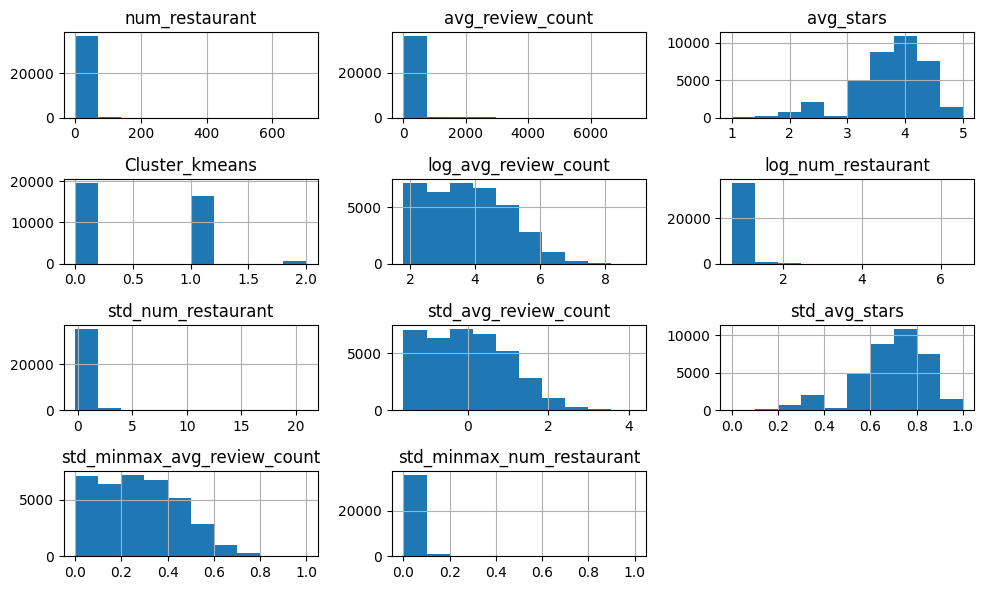

In [ ]:
data.hist(figsize=(10,6))
plt.tight_layout()
plt.show()

In [ ]:
data.sort_values(by='num_restaurant',ascending=False).head()

,num_restaurant,avg_review_count,avg_stars,Cluster_kmeans,log_avg_review_count,log_num_restaurant,std_num_restaurant,std_avg_review_count,std_avg_stars,std_minmax_avg_review_count,std_minmax_avg_num_restaurant
22904,703,24.69,1.86,2,3.246102,6.556778,20.938689,-0.419204,0.2150,0.204330,1.000000
32096,459,8.98,2.59,2,2.300583,6.131226,19.402122,-1.180937,0.3975,0.071488,0.927425
23719,365,22.81,2.15,2,3.170106,5.902633,18.576726,-0.480428,0.2875,0.193653,0.888440
27079,338,15.55,2.03,2,2.806386,5.826,18.300022,-0.773450,0.2575,0.142552,0.875371
25542,331,18.62,2.02,2,2.976549,5.805135,18.224683,-0.636362,0.2550,0.166459,0.871813


In [ ]:
import plotly.express as px

fig = px.scatter(data, x="num_restaurant", y="avg_stars",size="avg_review_count",size_max=60,log_x=True)
fig.show()

In [ ]:
data.describe()

,num_restaurant,avg_review_count,avg_stars,log_avg_review_count,log_num_restaurant,std_num_restaurant,std_avg_review_count,std_avg_stars,std_minmax_avg_review_count,std_minmax_avg_num_restaurant
count,36744.0,36744.000000,36744.000000,36744.000000,36744.0,3.674400e+04,3.674400e+04,36744.000000,36744.000000,36744.000000
mean,1.422981,98.016429,3.747898,3.766448,0.757814,-3.620009e-16,-3.465307e-16,0.686974,0.277437,0.011028
std,7.064371,199.508106,0.680778,1.241290,0.276954,1.000014e+00,1.000014e+00,0.170195,0.174397,0.047232
min,1.0,5.000000,1.000000,1.791759,0.693147,-2.334949e-01,-1.590858e+00,0.000000,0.000000,0.000000
25%,1.0,15.000000,3.500000,2.772589,0.693147,-2.334949e-01,-8.006777e-01,0.625000,0.137803,0.000000
50%,1.0,39.000000,4.000000,3.688879,0.693147,-2.334949e-01,-6.249134e-02,0.750000,0.266539,0.000000
75%,1.0,105.000000,4.000000,4.663439,0.693147,-2.334949e-01,7.226379e-01,0.750000,0.403461,0.000000
max,703.0,7400.000000,5.000000,8.909370,6.556778,2.093869e+01,4.143265e+00,1.000000,1.000000,1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

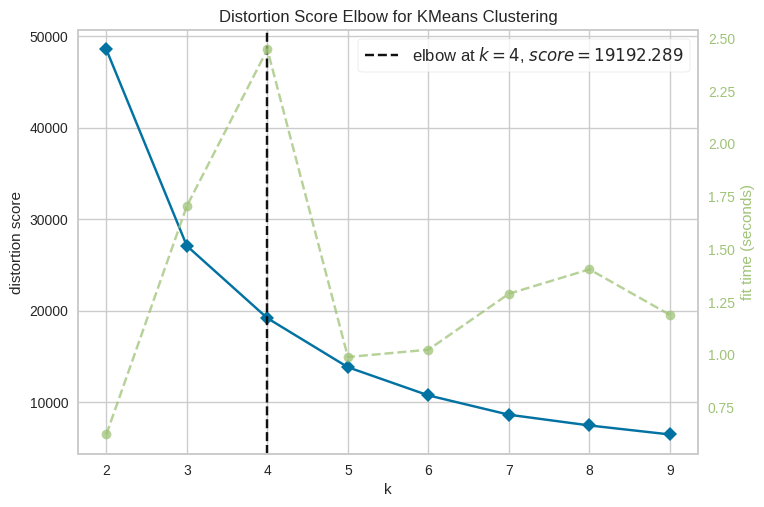

NameError: name 'plt' is not defined

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(data[['std_avg_review_count','std_num_restaurant','std_avg_stars']])
visualizer.show()
plt.show()

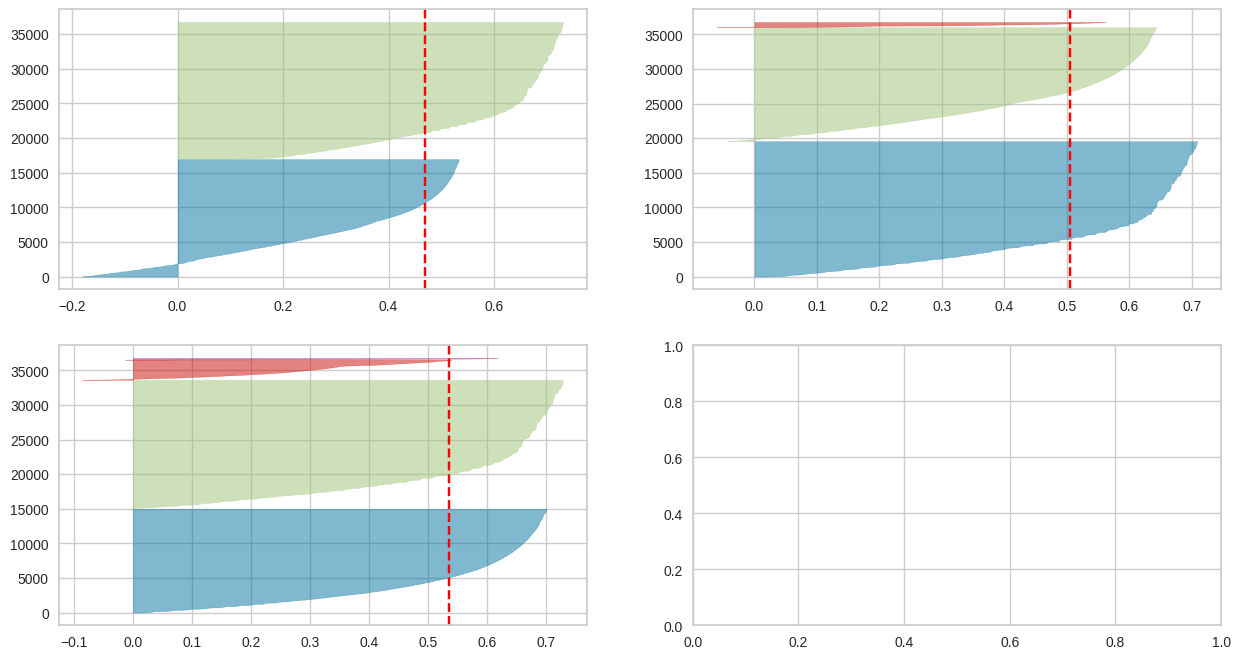

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data[['std_avg_review_count','std_num_restaurant','std_avg_stars']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


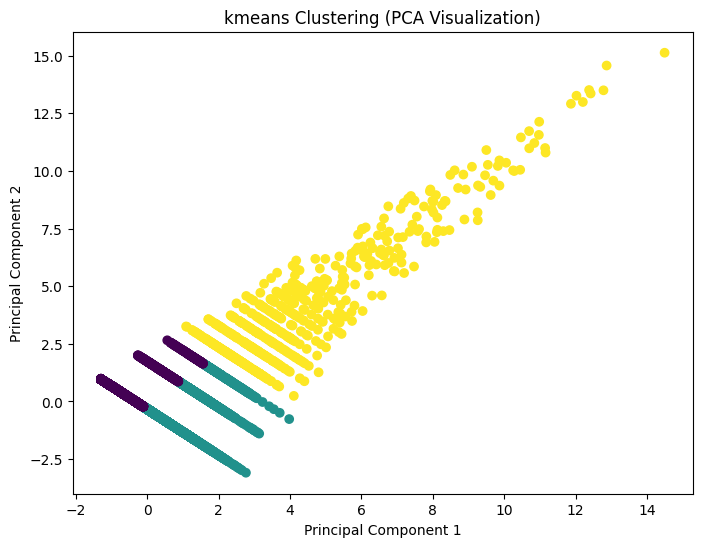

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply KMeans clustering
kmeans_model = KMeans(n_clusters=3, random_state=3)
clusters_kmeans = kmeans_model.fit_predict(data[['std_avg_review_count','std_num_restaurant','std_avg_stars']])

# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[['std_avg_review_count','std_num_restaurant','std_avg_stars']])

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_kmeans, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('kmeans Clustering (PCA Visualization)')
plt.show()

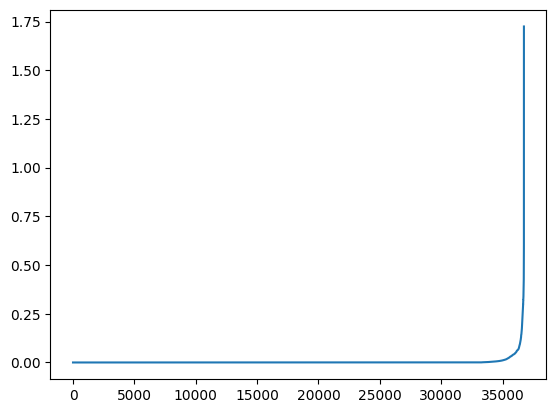

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(data[['std_avg_review_count','std_num_restaurant','std_avg_stars']])
distances, indices = neigh.kneighbors(data[['std_avg_review_count','std_num_restaurant','std_avg_stars']])

# 绘制 k-distance 图
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

DBSCAN_model = DBSCAN(eps=35000,min_samples=4)
clusters_DBSCAN = DBSCAN_model.fit_predict(data[['std_avg_review_count','std_num_restaurant','std_avg_stars']])
# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[['std_avg_review_count','std_num_restaurant','std_avg_stars']])

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_DBSCAN, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering (PCA Visualization)')
plt.show()

In [ ]:
# here we add a column to the original dataframe to show predicted cluster for each restaurant
restaurant_name_aggdf['Cluster_kmeans'] = kmeans_model.fit_predict(data[['std_avg_review_count','std_num_restaurant','std_avg_stars']])
#restaurant_name_aggdf['Cluster_DBSCAN'] = DBSCAN_model.fit_predict(data[['std_avg_review_count','std_num_restaurant','std_avg_stars']])
restaurant_name_aggdf.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,num_restaurant,avg_review_count,avg_stars,Cluster_kmeans
0,Oceana Grill,1,7400.0,4.0,1
1,Hattie B’s Hot Chicken - Nashville,1,6093.0,4.5,1
2,Reading Terminal Market,1,5721.0,4.5,1
3,Ruby Slipper - New Orleans,1,5193.0,4.5,1
4,Royal House,1,5070.0,4.0,1


In [ ]:
restaurant_name_aggdf['Cluster_kmeans'].value_counts()

Cluster_kmeans
0    19610
1    16394
2      740
Name: count, dtype: int64

In [ ]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(restaurant_name_aggdf, x="num_restaurant", y="avg_stars",size="avg_review_count",color='Cluster_kmeans',log_x=True,size_max=60)
fig.show()

In [ ]:
restaurant_name_aggdf['Cluster_DBSCAN'].value_counts()

Cluster_DBSCAN
 1    36698
-1       32
 0       14
Name: count, dtype: int64

In [ ]:
len(restaurant_name_aggdf)

36744

In [ ]:
restaurant_name_aggdf.dtypes

name                 object
num_restaurant        Int64
avg_review_count    float64
avg_stars           float64
Cluster_kmeans        int32
dtype: object

###Joining table restaurant_ame_aggdf&restaurant_data

In [ ]:
#adding the cluster column to the original restaurant data
"""note:here shows the process we have done through SQL query,we didn't use the colab to store the new table back to BigQuery,
we have finished the query on BigQuery directly and save them as a new table"""

query = f"""
SELECT * FROM `bdaoima-422710.restaurant_data.restaurant_data` a
left join
(select name,Cluster_kmeans,num_restaurant from `bdaoima-422710.restaurant_data.restaurant_name_agg`) b
on a.name=b.name"""
query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_data_cluster = query_job.to_dataframe()
restaurant_data_cluster.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking,name_1,Cluster_kmeans,num_restaurant
0,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,...,None,None,<NA>,None,<NA>,<NA>,<NA>,Hibachi Express,2,7
1,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,TN,37188,36.464747,-86.659187,3.5,8,...,None,None,<NA>,None,<NA>,<NA>,<NA>,Domino's Pizza,2,295
2,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,201 Jefferson St,Bala Cynwyd,PA,19004,40.028357,-75.238084,5.0,12,...,None,None,<NA>,None,<NA>,<NA>,True,Core de Roma,0,1
3,RK6-cJ9hj53RzOlCBmpT-g,Impasto,None,Tampa,FL,33611,27.890814,-82.502346,5.0,5,...,None,None,<NA>,None,<NA>,<NA>,<NA>,Impasto,0,1
4,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab,51 Ludwig Dr,Fairview Heights,IL,62208,38.601298,-89.989683,2.5,14,...,None,None,<NA>,None,<NA>,<NA>,True,Crafty Crab,2,6


In [ ]:
restaurant_data_cluster.shape

(52286, 780)

In [ ]:
# First, ensure pandas-gbq is installed
!pip install pandas-gbq

# Specify the destination table and dataset in BigQuery
# Replace 'your_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'restaurant_data.restaurant_name_agg'
project_id = 'bdaoima-422710'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
restaurant_name_aggdf.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 994.62it/s]


### Query data from restaurant checkin data file (examples)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "bdaoima-422710"
dataset_name = "restaurant_data"
table_name = "restaurant_checkin" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT business_id,count(*)
    FROM `{project_id}.{dataset_name}.{table_name}`
    group by business_id
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

,business_id,f0_
0,-v23pO9PUja15AiuUOW6tg,256
1,2VczMMo9tWBNPBEHMnoP5w,256
2,4B5ORibJ3vhimhW8LTY6Fg,256
3,4zQV6v8TwEYMwI9Ekdf19g,256
4,52ov7d0148JvYG78_c-Bsw,256


In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT business_id, total_number_of_checkin, year, month, day, hour
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

In [ ]:
# Query data based on condition from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
    WHERE year >=2020
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

In [ ]:
query = f"""
    SELECT year,
case when month between 1 and 3 then 1
when month between 4 and 6 then 2
when month between 7 and 9 then 3
when month between 10 and 12 then 4
end as quarter,
month,hour,count(*) as num_checkin FROM `{project_id}.{dataset_name}.{table_name}`
group by year,quarter,month,hour
order by year desc
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df

,year,quarter,month,hour,num_checkin
0,2022,1,1,23,1336
1,2022,1,1,8,24
2,2022,1,1,22,1078
3,2022,1,1,17,1059
4,2022,1,1,13,262
...,...,...,...,...,...
3477,2010,1,2,10,2
3478,2010,1,1,9,5
3479,2010,1,1,8,1
3480,2009,4,12,0,1


### Query data from restaurant tips data file (examples)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "bdaoima-422710"
dataset_name = "restaurant_data"
table_name = "restaurant_tips" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT user_id, business_id, text,date
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

In [ ]:
# Query data based on condition from the table
query = f"""
    SELECT user_id, business_id, text, date
    FROM `{project_id}.{dataset_name}.{table_name}`
    WHERE EXTRACT(YEAR from date)>2020
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

### Joining tables through SQL query (example)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "bdaoima-422710"
dataset_name = "restaurant_data"
table_1 = "restaurant_data"
table_2 = "restaurant_checkin"
table_3 = "restaurant_tips"

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Adding restaurant information to checkin data by joining 'restaurant_checkin' and 'restaurant_data'
query = f"""
    SELECT r.business_id, r.name, r.address, r.city, r.state, r.stars, r.review_count, r.is_open, r.categories,c.business_id, c.total_number_of_checkin, c.year, c.month, c.day, c.hour
    FROM `{project_id}.{dataset_name}.{table_2}` AS c
    JOIN `{project_id}.{dataset_name}.{table_1}` AS r on r.business_id = c.business_id
    WHERE c.year >=2020
"""

query_job = bigquery_client.query(query)
results = query_job.result()

join_df = query_job.to_dataframe()
join_df.head()

When joining, be careful of one-to-many. In restaurant data there are information for each restaurant, but in checkin and tips data there are multiple records for one single restaurants. Thus, it is better to use checkin or tips data to join restaurant data. If you do the opposite, you might have error and query incomplete data.

If you are just not familiar with SQL, you can just query dataset one by one and then use Python to merge or join them if you need.

Query data from restaurant data cluster

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `bdaoima-422710.restaurant_data.restaurant_data_cluster`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df_cluster = query_job.to_dataframe()
restaurant_df_cluster.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking,name_1,Cluster_kmeans,num_restaurant
0,doN8QSdGtlIAW7BP8afZEg,McDonald's,109 E Hwy 50,O'Fallon,IL,62269,38.584549,-89.909163,1.5,45,...,None,None,<NA>,None,<NA>,<NA>,False,McDonald's,2,703
1,e8VlQHJYDyfMo5J--qyY9g,Krispy Kreme,3113 W Kennedy Blvd,Tampa,FL,33609,27.945087,-82.493933,3.0,87,...,None,None,<NA>,None,<NA>,<NA>,True,Krispy Kreme,2,7
2,dRNrAjTbe9DCdpJUIW4c0g,Mr Lee's Asian Gourmet,1134 N Gravel Pike,Zieglerville,PA,19492,40.275734,-75.478052,3.5,27,...,None,None,<NA>,None,<NA>,<NA>,<NA>,Mr Lee's Asian Gourmet,0,1
3,2l1rAQ3tonK68LQEKtEiGA,The Market at Del Val,2100 Lower State Rd,Doylestown,PA,18901,40.293535,-75.150953,4.0,16,...,None,None,<NA>,None,<NA>,<NA>,True,The Market at Del Val,0,1
4,cHrzPYXVLd1BEXWqi6Ug6Q,Ark Brewery,106 Ark Rd,Lumberton,NJ,08048,39.941709,-74.852849,3.0,35,...,None,None,<NA>,None,<NA>,<NA>,True,Ark Brewery,0,1


# **Data processing and data analysis**

Since the query data is converted into dataframe, you can easily use Python to do analysis or modelling. This is up to you how you would do.

# **Store the transformed data back to BigQuery for visualisation**

We know data visualisation requires clean data and if we read data directly in Tableau it might crash because the data size is large and the data might messy.

You could consider using Python to clean and process your data and then you can store the transformed data table back to BigQuery and then you can make connections to the transformed table in Tableau to do visualisation.

In [ ]:
# First, ensure pandas-gbq is installed
# !pip install pandas-gbq

# Specify the destination table and dataset in BigQuery
# Replace 'your_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'your_dataset_name.transformed_table_name'
project_id = 'your-project-id'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
clean_df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 1563.29it/s]


By running the above code, you should be able to see there is a new table uploaded to BigQuery under your dataset.

Next, you can consider using Tableau for some visual analysis:)

Let me know if you have further questions.